# Tema 2
### Topics de interés en la web de GitHub
Angular 


In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs, BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.chrome.service import Service

chrome ="/usr/lib/chromium-browser/chromedriver"
path = (chrome)
s = Service(path)
driver = webdriver.Chrome(service=s)

url_base = "https://github.com/topics/angular"
page = requests.get(url_base)

driver.get(url_base)

lista_topics = list()

for i in range(10):
    driver.find_element_by_css_selector(".ajax-pagination-btn").click()
    time.sleep(1)

soup = BeautifulSoup(driver.page_source, 'html.parser')
topics_github = soup.find_all("a", class_= "topic-tag")

driver.quit()

for index,i in enumerate(topics_github):
    lista_topics.append(i.text.strip())
df =pd.DataFrame({'Topic':lista_topics} )


In [2]:
df =pd.DataFrame({'Topic':lista_topics} )
nro_apariciones = dict((i, lista_topics.count(i)) for i in lista_topics)
df.to_csv('Respuesta.csv')

In [3]:
df = pd.DataFrame([[key, nro_apariciones[key]] for key in nro_apariciones.keys()], columns=['Topic', 'Repeticiones'])
df_topics_descendente = df.sort_values(by=['Repeticiones'],ascending=False)
print(df_topics_descendente)

               Topic  Repeticiones
8            angular           146
0              react            49
1         javascript            45
25        typescript            43
12               vue            31
..               ...           ...
324       hot-reload             1
325  angular-routing             1
326     music-player             1
327       soundcloud             1
768       deprecated             1

[769 rows x 2 columns]


<AxesSubplot:title={'center':'Lista de topics'}, xlabel='Topic'>

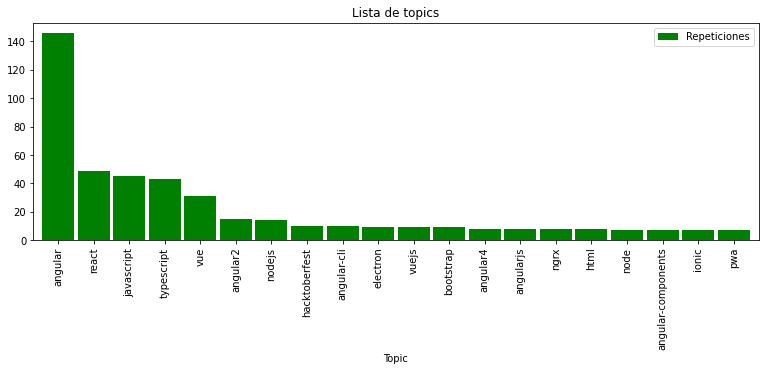

In [4]:
grafico = df_topics_descendente[:20].copy()
grafico.plot.bar(x='Topic', y='Repeticiones' ,title='Lista de topics', color='green',width = 0.9 ,figsize=(13,4))